In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import sqlite3

In [2]:
os.chdir(r'../Data')

In [3]:
conn=sqlite3.connect('./database.sqlite')

In [4]:
print(pd.read_sql_query('select * from artists',conn).head())
# print(pd.read_sql_query('select * from artists',conn).columns.values)
print(pd.read_sql_query('select * from artists',conn).columns)

   reviewid          artist
0     22703  massive attack
1     22721        krallice
2     22659    uranium club
3     22661         kleenex
4     22661         liliput
Index(['reviewid', 'artist'], dtype='object')


In [5]:
print(pd.read_sql_query('select * from content',conn).head())

   reviewid                                            content
0     22703  “Trip-hop” eventually became a ’90s punchline,...
1     22721  Eight years, five albums, and two EPs in, the ...
2     22659  Minneapolis’ Uranium Club seem to revel in bei...
3     22661  Kleenex began with a crash. It transpired one ...
4     22725  It is impossible to consider a given release b...


In [6]:
pd.read_sql_query('select * from genres',conn).head()

,reviewid,genre
0,22703,electronic
1,22721,metal
2,22659,rock
3,22661,rock
4,22725,electronic


In [7]:
pd.read_sql_query('select * from labels',conn).head()

,reviewid,label
0,22703,virgin
1,22721,hathenter
2,22659,static shock
3,22659,fashionable idiots
4,22661,kill rock stars


In [8]:
reviews=pd.read_sql_query('select * from reviews',conn)
reviews.head()

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017


In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewid        18393 non-null  int64  
 1   title           18393 non-null  object 
 2   artist          18393 non-null  object 
 3   url             18393 non-null  object 
 4   score           18393 non-null  float64
 5   best_new_music  18393 non-null  int64  
 6   author          18393 non-null  object 
 7   author_type     14487 non-null  object 
 8   pub_date        18393 non-null  object 
 9   pub_weekday     18393 non-null  int64  
 10  pub_day         18393 non-null  int64  
 11  pub_month       18393 non-null  int64  
 12  pub_year        18393 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 1.8+ MB


In [10]:
reviews['best_new_music'].value_counts()

0    17450
1      943
Name: best_new_music, dtype: int64

In [11]:
pd.read_sql_query('select * from years',conn).head()

,reviewid,year
0,22703,1998.0
1,22721,2016.0
2,22659,2016.0
3,22661,2016.0
4,22725,2016.0


In [12]:
df=pd.read_sql_query("select r.reviewid,r.title,r.score,r.best_new_music,a.artist,r.author,r.author_type,r.pub_month,r.pub_year,g.genre,l.label from reviews r left join labels l on r.reviewid=l.reviewid left join genres g on r.reviewid=g.reviewid join artists a on r.reviewid=a.reviewid",conn)
df.head()

,reviewid,title,score,best_new_music,artist,author,author_type,pub_month,pub_year,genre,label
0,22703,mezzanine,9.3,0,massive attack,nate patrin,contributor,1,2017,electronic,virgin
1,22721,prelapsarian,7.9,0,krallice,zoe camp,contributor,1,2017,metal,hathenter
2,22659,all of them naturals,7.3,0,uranium club,david glickman,contributor,1,2017,rock,fashionable idiots
3,22659,all of them naturals,7.3,0,uranium club,david glickman,contributor,1,2017,rock,static shock
4,22661,first songs,9.0,1,kleenex,jenn pelly,associate reviews editor,1,2017,rock,kill rock stars


In [13]:
conn.close()

In [14]:
#df=pd.read_sql_query("select r.reviewid,r.title,r.artist,r.url,r.score,r.best_new_music,r.author,r.author_type,r.pub_date,r.pub_weekday,r.pub_day,r.pub_month,r.pub_year,y.year from reviews r left join years y on r.reviewid=y.reviewid left join labels l on r.reviewid=l.reviewid left join genres g on r.reviewid=g.reviewid left join content c on r.reviewid=c.reviewid",conn)
#df.head()

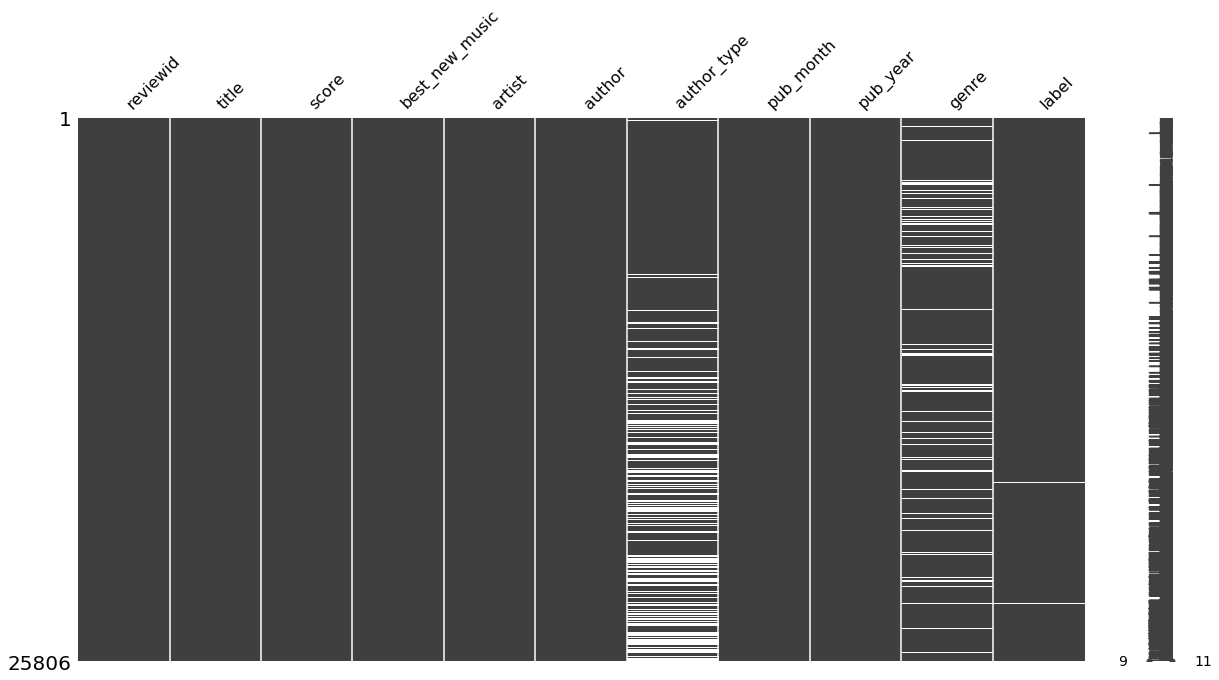

In [15]:
import missingno
missingno.matrix(df,figsize=(20,10))

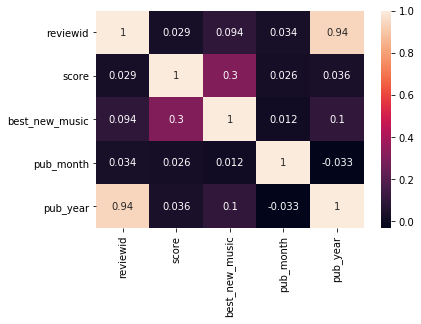

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
df.isnull().sum()

reviewid             0
title                0
score                0
best_new_music       0
artist               0
author               0
author_type       5630
pub_month            0
pub_year             0
genre             2591
label               44
dtype: int64

In [18]:
df=df.drop(['reviewid','title'],axis=1)

In [19]:
df.head()

,score,best_new_music,artist,author,author_type,pub_month,pub_year,genre,label
0,9.3,0,massive attack,nate patrin,contributor,1,2017,electronic,virgin
1,7.9,0,krallice,zoe camp,contributor,1,2017,metal,hathenter
2,7.3,0,uranium club,david glickman,contributor,1,2017,rock,fashionable idiots
3,7.3,0,uranium club,david glickman,contributor,1,2017,rock,static shock
4,9.0,1,kleenex,jenn pelly,associate reviews editor,1,2017,rock,kill rock stars


# Features

## Artists

In [20]:
df['artist'].value_counts()

various artists       785
xiu xiu                42
prince                 40
xasthur                36
deerhoof               36
                     ... 
get back guinozzi!      1
defeated sanity         1
digital mystikz         1
mochipet                1
lupine howl             1
Name: artist, Length: 8633, dtype: int64

## Score

In [21]:
df['score']

0        9.3
1        7.9
2        7.3
3        7.3
4        9.0
        ... 
25801    6.3
25802    7.2
25803    7.2
25804    7.2
25805    6.5
Name: score, Length: 25806, dtype: float64

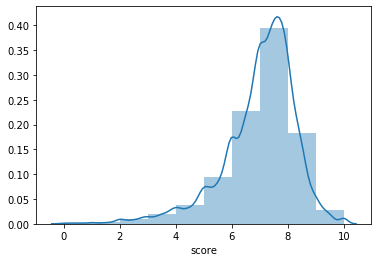

In [22]:
sns.distplot(df['score'],bins=10)

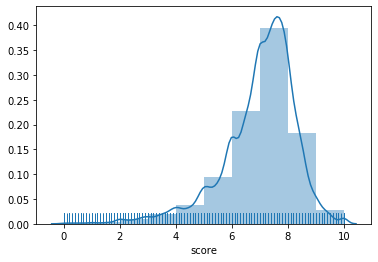

In [23]:
sns.distplot(a=df.score,bins=10,hist=True,kde=True,rug=True);


In [24]:
df['score'].value_counts(bins=10)

(7.0, 8.0]       10104
(6.0, 7.0]        6474
(8.0, 9.0]        3759
(5.0, 6.0]        2818
(4.0, 5.0]        1147
(3.0, 4.0]         568
(9.0, 10.0]        519
(2.0, 3.0]         260
(1.0, 2.0]         105
(-0.011, 1.0]       52
Name: score, dtype: int64

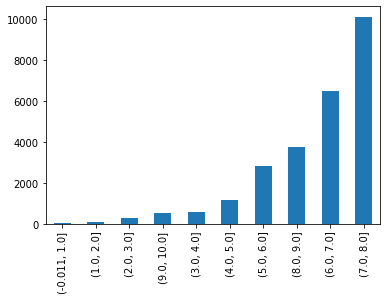

In [25]:
df['score'].value_counts(bins=10,ascending=True).plot(kind='bar',)

## Best New Music

In [26]:
df['best_new_music'].value_counts()

0    24434
1     1372
Name: best_new_music, dtype: int64

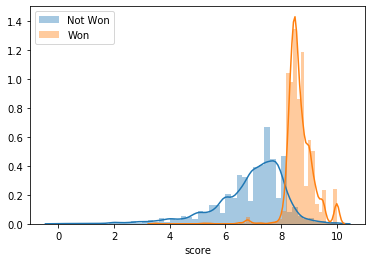

In [27]:
sns.distplot(df[df['best_new_music']==0]['score'])
sns.distplot(df[df['best_new_music']==1]['score'])
plt.legend(labels=['Not Won','Won'])
plt.show()

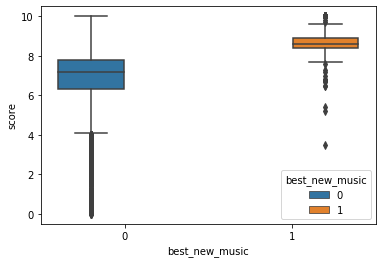

In [28]:
plt.figure()
sns.boxplot(y='score',x='best_new_music',hue='best_new_music',data=df)

In [29]:
df[(df['score']<4)&(df['best_new_music']==1)]

,score,best_new_music,artist,author,author_type,pub_month,pub_year,genre,label
9832,3.5,1,weezer,ian cohen,contributor,11,2010,rock,geffen


In [30]:
df.drop([9832],axis=0,inplace=True)

## Author

In [ ]:
df['author'].value_counts(dropna=False)

In [ ]:
df[df['score']>7]['author'].value_counts()

## Author Type

In [ ]:
df['author_type'].value_counts(dropna=False)

In [ ]:
plt.figure(figsize=(30,8))
sns.boxplot(x='author_type',data=df,y='score')

In [ ]:
df.isnull().sum()

In [ ]:
df['author_type']=df['author_type'].fillna(df['author_type'].mode()[0])

In [ ]:
df.isnull().sum()

## Date
### pub_month,pub_year

In [ ]:
df['pub_year'].value_counts()

In [ ]:
df[df['best_new_music']==1].groupby(by='pub_year').mean()['score']

In [ ]:
df.groupby(by=['pub_year']).mean().T

In [ ]:
plt.figure(figsize=(14,5))
sns.lineplot(y=df[df['best_new_music']==0].groupby(by='pub_year').mean()['score'], x=df[df['best_new_music']==0].groupby(by='pub_year').mean().index)
sns.lineplot(y=df[df['best_new_music']==1].groupby(by='pub_year').mean()['score'], x=df[df['best_new_music']==1].groupby(by='pub_year').mean().index)
plt.legend(labels=['Not Won','Won'])
plt.show()

## Inference
    1.Best New Music awards started from 2003
    2. Removing values from 2017 since it seems that data has been taken from early 2017

In [ ]:
df=df[df['pub_year']!=2017]

### pub_month

In [ ]:
df['pub_month'].value_counts()

## Genre

In [ ]:
df['genre'].value_counts(dropna=False)

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df['genre'])
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='genre',hue='best_new_music',data=df)
plt.show()

## Labels

In [ ]:
df['label'].isnull().sum()

In [ ]:
df['label'].fillna('None',inplace=True)

## Base Model

In [ ]:
df.head()

In [ ]:
## Shape before Dropping
df.shape

In [ ]:
cat_cols=list(df.select_dtypes(include=['object']).columns)
cat_cols

In [ ]:
cols=['author_type','genre']
df=pd.get_dummies(df,columns=cols,drop_first=True)

In [ ]:
df['label'].isnull().sum()

In [ ]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['artist']=le.fit_transform(df['artist'])
df['author']=le.fit_transform(df['author'])
df['label']=le.fit_transform(df['label'])
#df['pub_year']=le.fit_transform(df['pub_year'])

In [ ]:
#df=df.dropna()

### MICE imputer

In [ ]:
'''from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)'''

In [ ]:
'''df=pd.DataFrame(imp.fit_transform(df))'''

In [ ]:
## Shape after dropping
#df.shape

In [ ]:
df.head()

In [ ]:
df.iloc[:,[1]]

In [ ]:
df.isnull().sum()

In [ ]:
df=df.drop(['reviewid','title'],axis=1)

## Generating X and Y

In [ ]:
y=df['score']
X=df.drop('score',axis=1)

## 1. Base Model

In [ ]:
import statsmodels.api as sm
xc=sm.add_constant(X)
model=sm.OLS(y,xc).fit()
model.summary()

In [ ]:
residuals=model.resid
sns.distplot(residuals)

In [ ]:
import scipy.stats as stats
stats.probplot(residuals,plot=plt)
plt.show()

## 2. Model using Backward Elimation method

In [ ]:
# Backward Elimination
cols=list(X.columns)
pmax=1
while len(cols)>0:
    p=[]
    C=X[cols]
    xc=sm.add_constant(C)
    model=sm.OLS(y,xc).fit()
    p=pd.Series(model.pvalues.values[1:],index=cols)
    pmax=max(p)
    feature_with_p_max=p.idxmax()
    if pmax>0.05:
        cols.remove(feature_with_p_max)
    else:
        break
        
selected_cols=cols
print(selected_cols)

In [ ]:
X_final=df[cols]
y=df['score']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error as mse
X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.3,random_state=0)

In [ ]:
LR=LinearRegression()
LR.fit(Xtrain,ytrain)
y_pred_train=LR.predict(Xtrain)
print('R2 score of Train:',r2_score(ytrain,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(ytrain,y_pred_train)))

In [ ]:
y_pred_test=LR.predict(Xtest)
print('R2 score of Test:',r2_score(ytest,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(ytest,y_pred_test)))

## 3. K-Fold

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=0)
for model,name in zip([LR],['MVLR']):
    rmse=[]

    for train, test in kf.split(X_final,y):
        X_train,X_test=X_final.iloc[train,:],X_final.iloc[test,:]
        y_train,y_test=y.iloc[train],y.iloc[test]
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        rmse.append(np.sqrt(mse(y_test,y_pred)))
print(rmse)

In [ ]:
np.mean(rmse),np.var(rmse,ddof=1)


### 4.Lasso/Ridge/ElasticNet

## 4.1 Lasso

In [ ]:
from sklearn.linear_model import Lasso,LassoCV
lasso=Lasso(alpha=0.04,normalize=True)

In [ ]:
X_final=df[cols]
y=df['score']
Xtrain,Xtest,ytrain,ytest=train_test_split(X_final,y,test_size=0.3,random_state=0)

In [ ]:
lasso.fit(Xtrain,ytrain)
y_pred_train=lasso.predict(Xtrain)
print('R2 score of Train:',r2_score(ytrain,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(ytrain,y_pred_train)))

In [ ]:
y_pred_test=lasso.predict(Xtest)
print('R2 score of Test:',r2_score(ytest,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(ytest,y_pred_test)))

In [ ]:
n_alphas = 50
alphas = np.linspace(0.1,4.5, n_alphas)
coefs=[]
lasso = Lasso()
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    
plt.plot(alphas, coefs)
plt.xlabel('alphas')
plt.ylabel('coefs')
plt.show()

In [ ]:
n_alphas=50
alphas=np.linspace(0.1,1, n_alphas)

lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=22)
lasso_cv.fit(X,y)

In [ ]:
lasso_cv.alpha_

In [ ]:
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso.fit(Xtrain, ytrain)
lasso.coef_
pd.DataFrame(lasso.coef_, X.columns, columns=['coefs'])

In [ ]:
lasso.fit(Xtrain,ytrain)
y_pred_train=lasso.predict(Xtrain)
print('R2 score of Train:',r2_score(ytrain,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(ytrain,y_pred_train)))

In [ ]:
y_pred_test=lasso.predict(Xtest)
print('R2 score of Test:',r2_score(ytest,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(ytest,y_pred_test)))

### 4.2 Ridge

In [ ]:
from sklearn.linear_model import Ridge,RidgeCV
ridge=Ridge(alpha=0.05)

In [ ]:
ridge.fit(Xtrain,ytrain)
y_pred_train=model.predict(Xtrain)
print('R2 score of Train:',r2_score(ytrain,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(ytrain,y_pred_train)))

In [ ]:
y_pred_test=ridge.predict(Xtest)
print('R2 score of Test:',r2_score(ytest,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(ytest,y_pred_test)))

In [ ]:
ridge.fit(X, y)
ridge.coef_
pd.DataFrame(ridge.coef_, X.columns, columns=['coefs'])

In [ ]:
n_alphas = 200
alphas = np.logspace(-3, 2, n_alphas)
coefs=[]
model = Ridge()
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
    
plt.plot(alphas, coefs)
plt.xlabel('alphas')
plt.ylabel('coefs')
plt.show()

In [ ]:
n_alphas = 1000
alphas = np.logspace(-2, 0)

ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X, y)

ridge_cv.alpha_

In [ ]:
ridge=Ridge(alpha=ridge_cv.alpha_)
ridge.fit(Xtrain,ytrain)

In [ ]:
y_pred_train=ridge.predict(Xtrain)
print('R2 score of Train:',r2_score(ytrain,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(ytrain,y_pred_train)))

In [ ]:
y_pred_test=ridge.predict(Xtest)
print('R2 score of Test:',r2_score(ytest,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(ytest,y_pred_test)))

### 4.3 Elastic Net/Elastic Net CV

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
enet = ElasticNet(alpha=0.1)
enet.fit(Xtrain, ytrain)

In [ ]:
y_pred_train=enet.predict(Xtrain)
print('R2 score of Train:',r2_score(ytrain,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(ytrain,y_pred_train)))

In [ ]:
y_pred_test=enet.predict(Xtest)
print('R2 score of Test:',r2_score(ytest,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(ytest,y_pred_test)))

In [ ]:
pd.DataFrame(enet.coef_, X.columns, columns=['coefs'])

In [ ]:
n_alphas = 200
alphas = np.logspace(-3, -1, n_alphas)
coefs=[]
enet = ElasticNet()
for a in alphas:
    enet.set_params(alpha=a)
    enet.fit(X_train, y)
    coefs.append(model.coef_)
    
plt.plot(alphas, coefs)
plt.xlabel('alphas')
plt.ylabel('coefs')
plt.show()

In [ ]:
n_alphas = 2000
alphas = np.logspace(-3, 1, n_alphas)

en_cv = ElasticNetCV(alphas=alphas, cv=3)
en_cv.fit(X, y)
en_cv.alpha_

In [ ]:
enet = ElasticNet(alpha=en_cv.alpha)
enet.fit(X_train,y_train)

In [ ]:
y_pred_train=enet.predict(X_train)
print('R2 score of Train:',r2_score(ytrain,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(ytrain,y_pred_train)))

In [ ]:
y_pred_test=enet.predict(X_test)
print('R2 score of Test:',r2_score(ytest,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(ytest,y_pred_test)))

### 5 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [ ]:
y_pred_train=dtr.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

In [ ]:
y_pred_test=model.predict(X_test)
print('R2 score of Test:',r2_score(ytest,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(ytest,y_pred_test)))

### 6. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [ ]:
rfr.fit(Xtrain,ytrain)
y_pred_train=rfr.predict(Xtrain)
print('R2 score of Train:',r2_score(ytrain,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(ytrain,y_pred_train)))

In [ ]:
y_pred_test=rfr.predict(Xtest)
print('R2 score of Test:',r2_score(ytest,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(ytest,y_pred_test)))

### 7. KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnr=KNeighborsRegressor(n_neighbors=5)

In [ ]:
knnr.fit(X_train,y_train)
y_pred_train=knnr.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

In [ ]:
y_pred_test=knnr.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

### 8. Bayesian Ridge

In [ ]:
from sklearn.linear_model import BayesianRidge
bay=BayesianRidge()

In [ ]:
bay.fit(X_train,y_train)

In [ ]:
y_pred_train=bay.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

In [ ]:
y_pred_test=model.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

### 9. Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor
baggr_lr=BaggingRegressor(base_estimator=LinearRegression())

In [ ]:
baggr_lr.fit(X_train,y_train)
y_pred_train=baggr_lr.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

In [ ]:
y_pred_test=baggr_lr.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

In [ ]:
baggr_dt=BaggingRegressor(base_estimator=DecisionTreeRegressor())
baggr_dt.fit(Xtrain,ytrain)
y_pred_train=baggr_dt.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

In [ ]:
y_pred_test=model.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

In [ ]:
baggr_knn=BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=5))
baggr_knn.fit(X_train,y_train)
y_pred_train=baggr_knn.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

In [ ]:
y_pred_test=baggr_knn.predict(Xtest)
print('R2 score of Test:',r2_score(ytest,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(ytest,y_pred_test)))

### 10. Boosting

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=LinearRegression())
ada.fit(X_train,y_train)
y_pred_train=ada.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

In [ ]:
y_pred_test=ada.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

In [ ]:
ada=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1))
ada.fit(X_train,y_train)
y_pred_train=ada.predict(X_train)
print('R2 score of Train:',r2_score(ytrain,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(ytrain,y_pred_train)))

In [ ]:
y_pred_test=ada.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

In [ ]:
ada=AdaBoostRegressor(base_estimator=RandomForestRegressor())
ada.fit(X_train,y_train)
y_pred_train=ada.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

In [ ]:
y_pred_test=ada.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

#